In [2]:
from utils import extract_frames
from deeptrack.models import LodeSTAR
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

d:\miniconda3\envs\ml\lib\site-packages\deeptrack\backend\_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
d:\miniconda3\envs\ml\lib\site-packages\deeptrack\backend\_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")


In [3]:
%matplotlib inline


In [4]:
def detect(frame, model, alpha=0.5, cutoff=0.99):    
    detections = model.predict_and_detect(frame[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]        
    return detections

In [8]:
frames = extract_frames("data\\videos\\04hz left.avi")
model = LodeSTAR(input_shape=(None, None, 3))
model.load_weights("./model/weights")

In [11]:
alpha = 0.1
cutoff = 0.9999

1/1 [==============================] - 0s 175ms/step


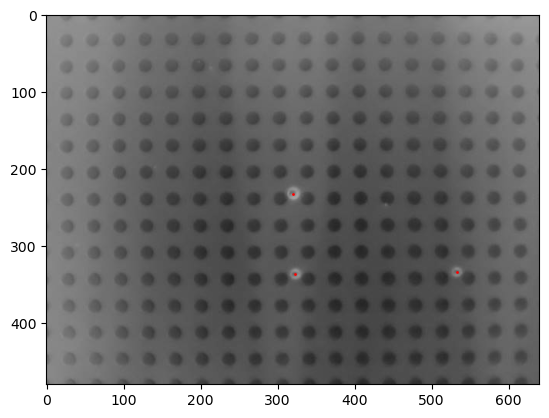

In [12]:
sample = frames[0]
sample_detections = detect(sample, model, alpha=alpha, cutoff=cutoff)
plt.imshow(sample)
plt.scatter(sample_detections[:, 1], sample_detections[:, 0], color="r", s=1)

In [13]:
detected = [detect(frame, model, alpha=alpha, cutoff=cutoff) for frame in frames[:100]]

1/1 [==============================] - 0s 199ms/step


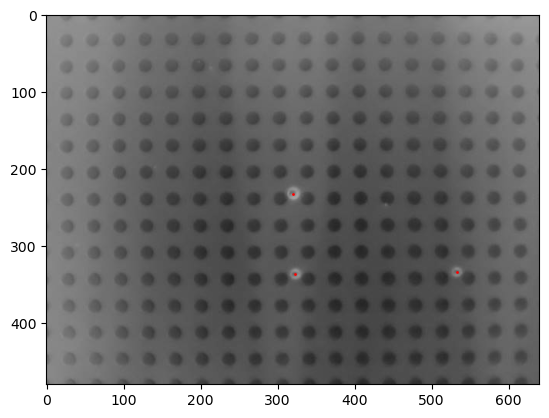

In [18]:
fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    # ax.set_xlim(0., 0.1)
    # ax.set_ylim(0.7, 0.75)
    ax.imshow(frames[i], cmap="gray")
    ax.scatter(detected[i][:, 1], detected[i][:, 0], color="r", s=1)

ani=animation.FuncAnimation(fig, animate, interval=1000/56.95, frames=range(100))
ani.save('detected.gif', writer='pillow')